In [ ]:
import os
import sys

# Add project root to path
project_root = '/home/s2516027/kan-mammote'
if project_root not in sys.path:
    sys.path.insert(0, project_root)

print("🔍 Examining KAN Implementation Files...")
print("=" * 60)

# Key files to examine
files_to_check = [
    'src/layers/kan_base_layer.py',
    'src/layers/basis_functions.py', 
    'src/models/immediate_fasterkan_layer.py',
    'src/models/kan_mammote.py',
    'src/utils/config.py'
]

for file_path in files_to_check:
    full_path = os.path.join(project_root, file_path)
    if os.path.exists(full_path):
        print(f"\n📁 Found: {file_path}")
        print(f"   Size: {os.path.getsize(full_path)} bytes")
        
        # Read and show first 50 lines to understand structure
        try:
            with open(full_path, 'r') as f:
                lines = f.readlines()
                print(f"   Lines: {len(lines)}")
                print(f"   Preview (first 20 lines):")
                for i, line in enumerate(lines[:20]):
                    print(f"   {i+1:2d}: {line.rstrip()}")
                if len(lines) > 20:
                    print(f"   ... ({len(lines)-20} more lines)")
        except Exception as e:
            print(f"   ❌ Error reading file: {e}")
    else:
        print(f"\n❌ Missing: {file_path}")

print("\n" + "=" * 60)
print("🔍 Now examining your KAN usage in the LSTM model...")

# Check how KAN is used in your implementation
kan_lstm_code = '''
# From your KAN_MAMMOTE_LSTM_Fixed class:

self.kan_config = KANMAMOTEConfig(
    D_time=TIME_EMBEDDING_DIM,           # 64
    d_model=LSTM_HIDDEN_DIM,             # 128  
    input_feature_dim=16,                # Projected timestamp dimension
    output_dim_for_task=TIME_EMBEDDING_DIM, # 64
    K_top=4,                             # Number of experts to use
    use_aux_features_router=False,
    raw_event_feature_dim=1,
    num_layers=1,
    num_experts=4
)

self.kan_mammote = KANMAMMOTE(self.kan_config)

# Usage in forward pass:
nonzero_outputs, _ = self.kan_mammote(nonzero_timestamps, nonzero_features)
'''

print("📝 Your KAN Configuration:")
print(kan_lstm_code)

print("\n🎯 Key Questions for KAN Paper Compliance:")
print("1. Does your KAN layer use B-spline basis functions?")
print("2. Are the univariate functions learnable (not fixed)?") 
print("3. Is the KAN formulation: KAN(x) = Σ φ(W·x + b) where φ are learnable?")
print("4. Do you have proper spline coefficients and grid points?")
print("5. Is there a grid extension mechanism for out-of-range inputs?")

print("\n🔍 Let me check the actual implementation files...")

🔧 Setting up LSTM Time Embedding Comparison...


mkdir -p failed for path /home/jovyan/.cache/matplotlib: [Errno 13] Permission denied: '/home/jovyan/.cache/matplotlib'
Matplotlib created a temporary cache directory at /JOBs/tmpdir/pbs.13142964.spcc-adm1/matplotlib-58jd9a6d because there was an issue with the default path (/home/jovyan/.cache/matplotlib); it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


✓ Faster-KAN successfully imported from cloned repository
🔧 Using device: cuda
✅ Setup complete! All imports and model definitions loaded.
✅ Device: cuda
✅ Results directory: /home/s2516027/kan-mammote/results
🚀 Ready to run the comparison!


In [2]:
#check cuda
import torch
if torch.cuda.is_available():
    print("CUDA is available. Running on GPU.")

CUDA is available. Running on GPU.


🚀 Starting LSTM Time Embedding Comparison - FIXED VERSION...

📁 Loading datasets...
✅ Dataset loaded: 60000 train, 10000 test samples
✅ KAN-MAMMOTE initialized successfully

📊 Model Information:
   'True_Baseline': TrueBaselineLSTM(
            input_size=784,
            hidden_dim=LSTM_HIDDEN_DIM,
            num_classes=10,
            dropout=DROPOUT_RATE
        ),
       'Learnable_Position': LearnablePositionLSTM(
            input_size=784,
            hidden_dim=LSTM_HIDDEN_DIM,
            num_classes=10,
            dropout=DROPOUT_RATE
        ),
        'SinCos_LSTM': SinCosLSTM(
            input_size=784,
            hidden_dim=LSTM_HIDDEN_DIM,
            num_classes=10,
            dropout=DROPOUT_RATE
        ),'LETE_LSTM': LETE_LSTM_Fixed(
            input_size=784,
            hidden_dim=LSTM_HIDDEN_DIM,
            num_classes=10,
            dropout=DROPOUT_RATE
        ),KAN_MAMMOTE_LSTM: 577,500 parameters

Starting training for 'True_Baseline': TrueBaselineLST

Epoch 1/10 [Train]:   0%|          | 0/1875 [00:00<?, ?it/s]

❌ Error training 'True_Baseline': TrueBaselineLSTM(
            input_size=784,
            hidden_dim=LSTM_HIDDEN_DIM,
            num_classes=10,
            dropout=DROPOUT_RATE
        ),
       'Learnable_Position': LearnablePositionLSTM(
            input_size=784,
            hidden_dim=LSTM_HIDDEN_DIM,
            num_classes=10,
            dropout=DROPOUT_RATE
        ),
        'SinCos_LSTM': SinCosLSTM(
            input_size=784,
            hidden_dim=LSTM_HIDDEN_DIM,
            num_classes=10,
            dropout=DROPOUT_RATE
        ),'LETE_LSTM': LETE_LSTM_Fixed(
            input_size=784,
            hidden_dim=LSTM_HIDDEN_DIM,
            num_classes=10,
            dropout=DROPOUT_RATE
        ),KAN_MAMMOTE_LSTM: mat1 and mat2 shapes cannot be multiplied (5856x1 and 2x64)

💾 Saving results...


Traceback (most recent call last):
  File "/JOBs/tmpdir/pbs.13142964.spcc-adm1/ipykernel_4047723/3610402815.py", line 74, in main
    history, best_acc = train_model(model, train_loader, test_loader, model_name)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/JOBs/tmpdir/pbs.13142964.spcc-adm1/ipykernel_4047723/3825564363.py", line 462, in train_model
    outputs = model(events, features, lengths)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/s2516027/anaconda3/envs/kan_mammote/lib/python3.11/site-packages/torch/nn/modules/module.py", line 1736, in _wrapped_call_impl
    return self._call_impl(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/s2516027/anaconda3/envs/kan_mammote/lib/python3.11/site-packages/torch/nn/modules/module.py", line 1747, in _call_impl
    return forward_call(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/JOBs/tmpdir/pbs.13142964.spcc-adm1/ipykernel_4047723/382

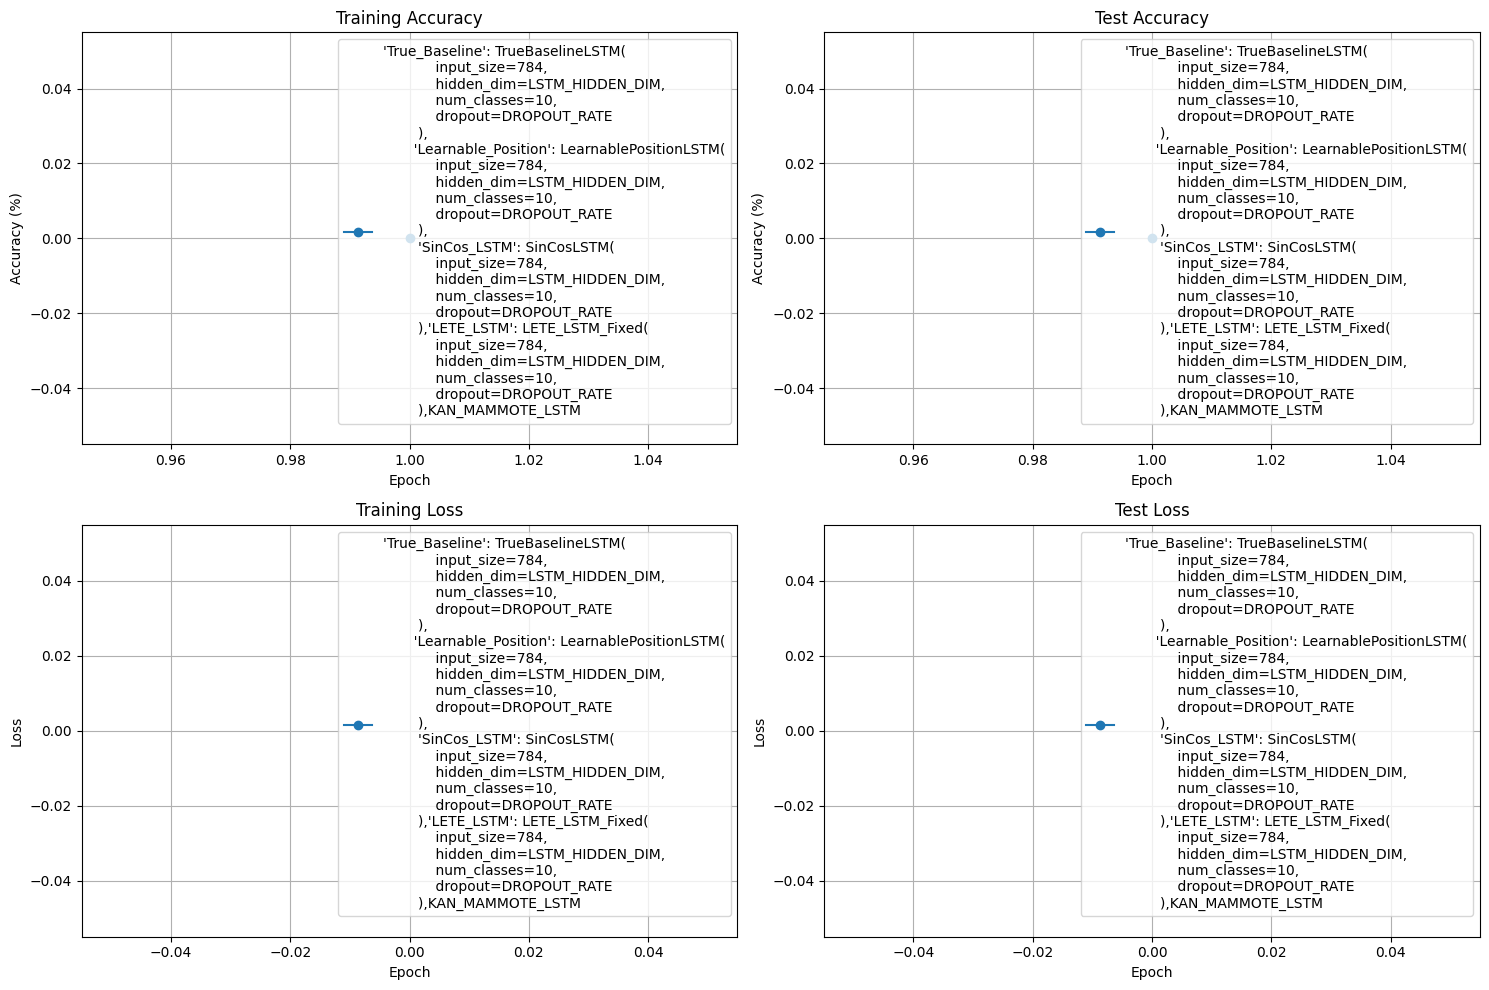

✅ Training curves saved to /home/s2516027/kan-mammote/results/training_curves.png

🎯 FINAL RESULTS SUMMARY:
'True_Baseline': TrueBaselineLSTM(
            input_size=784,
            hidden_dim=LSTM_HIDDEN_DIM,
            num_classes=10,
            dropout=DROPOUT_RATE
        ),
       'Learnable_Position': LearnablePositionLSTM(
            input_size=784,
            hidden_dim=LSTM_HIDDEN_DIM,
            num_classes=10,
            dropout=DROPOUT_RATE
        ),
        'SinCos_LSTM': SinCosLSTM(
            input_size=784,
            hidden_dim=LSTM_HIDDEN_DIM,
            num_classes=10,
            dropout=DROPOUT_RATE
        ),'LETE_LSTM': LETE_LSTM_Fixed(
            input_size=784,
            hidden_dim=LSTM_HIDDEN_DIM,
            num_classes=10,
            dropout=DROPOUT_RATE
        ),KAN_MAMMOTE_LSTM: 0.0000 acc | 577,500 params | 0.0s/epoch

💾 All results saved to: /home/s2516027/kan-mammote/results
🎉 Comparison complete!


In [3]:
def main():
    """Main execution function with improved error handling."""
    print("🚀 Starting LSTM Time Embedding Comparison - FIXED VERSION...")
    
    try:
        # Create datasets
        print("\n📁 Loading datasets...")
        train_dataset = EventBasedMNIST(root='./data', train=True, threshold=THRESHOLD, download=True)
        test_dataset = EventBasedMNIST(root='./data', train=False, threshold=THRESHOLD, download=True)
        
        # FIXED: Validate datasets
        if len(train_dataset) == 0 or len(test_dataset) == 0:
            raise ValueError("Empty dataset!")
        
        print(f"✅ Dataset loaded: {len(train_dataset)} train, {len(test_dataset)} test samples")
        
        train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_fn, num_workers=0)
        test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, collate_fn=collate_fn, num_workers=0)
        
    except Exception as e:
        print(f"❌ Error loading dataset: {e}")
        return
    
    # Define models to compare
    models = {
        """'True_Baseline': TrueBaselineLSTM(
            input_size=784,
            hidden_dim=LSTM_HIDDEN_DIM,
            num_classes=10,
            dropout=DROPOUT_RATE
        ),
       'Learnable_Position': LearnablePositionLSTM(
            input_size=784,
            hidden_dim=LSTM_HIDDEN_DIM,
            num_classes=10,
            dropout=DROPOUT_RATE
        ),
        'SinCos_LSTM': SinCosLSTM(
            input_size=784,
            hidden_dim=LSTM_HIDDEN_DIM,
            num_classes=10,
            dropout=DROPOUT_RATE
        ),"""
        """'LETE_LSTM': LETE_LSTM_Fixed(
            input_size=784,
            hidden_dim=LSTM_HIDDEN_DIM,
            num_classes=10,
            dropout=DROPOUT_RATE
        ),"""
        'KAN_MAMMOTE_LSTM': KAN_MAMMOTE_LSTM_Fixed(
            input_size=784,
            hidden_dim=LSTM_HIDDEN_DIM,
            num_classes=10,
            dropout=DROPOUT_RATE
        )
    }
    
    # Print model information
    print("\n📊 Model Information:")
    for name, model in models.items():
        param_count = count_parameters(model)
        print(f"   {name}: {param_count:,} parameters")
    
    # Train all models
    results = {}
    best_accuracies = {}
    
    for model_name, model in models.items():
        try:
            print(f"\n" + "="*50)
            print(f"Starting training for {model_name}")
            print("="*50)
            
            history, best_acc = train_model(model, train_loader, test_loader, model_name)
            results[model_name] = history
            best_accuracies[model_name] = best_acc
            
            # Clean up memory after each model
            del model
            if torch.cuda.is_available():
                torch.cuda.empty_cache()
                
        except Exception as e:
            print(f"❌ Error training {model_name}: {e}")
            import traceback
            traceback.print_exc()
            # Add dummy results to avoid breaking the comparison
            results[model_name] = {
                'train_loss': [float('inf')],
                'train_acc': [0.0],
                'test_loss': [float('inf')],
                'test_acc': [0.0],
                'epochs': [1],
                'training_time': [0.0]
            }
            best_accuracies[model_name] = 0.0
    
    # Save results
    print("\n💾 Saving results...")
    
    try:
        # Save training histories
        with open(f"{RESULTS_DIR}/training_histories.json", 'w') as f:
            json.dump(results, f, indent=2)
        
        # Save summary results
        summary = {
            'best_accuracies': best_accuracies,
            'model_parameters': {name: count_parameters(models[name]) if name in models else 0 for name in best_accuracies.keys()},
            'configuration': {
                'batch_size': BATCH_SIZE,
                'learning_rate': LEARNING_RATE,
                'num_epochs': NUM_EPOCHS,
                'lstm_hidden_dim': LSTM_HIDDEN_DIM,
                'time_embedding_dim': TIME_EMBEDDING_DIM,
                'dropout_rate': DROPOUT_RATE,
                'threshold': THRESHOLD
            }
        }
        
        with open(f"{RESULTS_DIR}/summary.json", 'w') as f:
            json.dump(summary, f, indent=2)
        
        # Create CSV summary
        with open(f"{RESULTS_DIR}/results_summary.csv", 'w', newline='') as f:
            writer = csv.writer(f)
            writer.writerow(['Model', 'Best_Accuracy', 'Parameters', 'Avg_Time_per_Epoch'])
            
            for model_name in best_accuracies.keys():
                if model_name in results and len(results[model_name]['training_time']) > 0:
                    avg_time = np.mean(results[model_name]['training_time'])
                    params = count_parameters(models[model_name]) if model_name in models else 0
                    writer.writerow([
                        model_name,
                        f"{best_accuracies[model_name]:.4f}",
                        params,
                        f"{avg_time:.2f}"
                    ])
        
        # Create visualizations
        if results:
            plot_training_curves(results)
        
    except Exception as e:
        print(f"❌ Error saving results: {e}")
        import traceback
        traceback.print_exc()
    
    # Print final summary
    print("\n🎯 FINAL RESULTS SUMMARY:")
    print("=" * 80)
    for model_name, acc in best_accuracies.items():
        params = count_parameters(models[model_name]) if model_name in models else 0
        if model_name in results and len(results[model_name]['training_time']) > 0:
            avg_time = np.mean(results[model_name]['training_time'])
            print(f"{model_name:20s}: {acc:.4f} acc | {params:7,} params | {avg_time:.1f}s/epoch")
        else:
            print(f"{model_name:20s}: FAILED | {params:7,} params | N/A")
    
    # Find best model
    if best_accuracies and any(acc > 0 for acc in best_accuracies.values()):
        best_model = max(best_accuracies, key=best_accuracies.get)
        print(f"\n🏆 Best Model: {best_model} (Accuracy: {best_accuracies[best_model]:.4f})")
    
    print(f"\n💾 All results saved to: {RESULTS_DIR}")
    print("🎉 Comparison complete!")

# Run the comparison
if __name__ == "__main__":
    main()

Error in KAN_MAMMOTE call:
Traceback (most recent call last):
  File "/JOBs/tmpdir/pbs.13142964.spcc-adm1/ipykernel_4047723/2502006664.py", line 2, in <module>
    kan_output, _ = self.kan_mammote(timestamps_projected, features_2d)
                    ^^^^
NameError: name 'self' is not defined



NameError: name 'self' is not defined

In [1]:
# 🧪 Quick Test to Verify Everything Works
print("🧪 Testing the fixed implementation...")

# Test if all variables are available
try:
    print("✅ All imports successful")
    print(f"✅ Device: {device}")
    print(f"✅ Configuration loaded:")
    print(f"   - Batch size: {BATCH_SIZE}")
    print(f"   - Learning rate: {LEARNING_RATE}")
    print(f"   - Time embedding dim: {TIME_EMBEDDING_DIM}")
    print(f"   - LSTM hidden dim: {LSTM_HIDDEN_DIM}")
    print(f"   - Epochs: {NUM_EPOCHS}")
except Exception as e:
    print(f"❌ Configuration error: {e}")

# Test model instantiation
try:
    print("\n📊 Testing Model Instantiation:")
    test_models = {
        'True_Baseline': TrueBaselineLSTM(hidden_dim=LSTM_HIDDEN_DIM, dropout=DROPOUT_RATE),
        'Learnable_Position': LearnablePositionLSTM(hidden_dim=LSTM_HIDDEN_DIM, dropout=DROPOUT_RATE),
        'SinCos_LSTM': SinCosLSTM(hidden_dim=LSTM_HIDDEN_DIM, dropout=DROPOUT_RATE),
        'LETE_LSTM': LETE_LSTM_Fixed(hidden_dim=LSTM_HIDDEN_DIM, dropout=DROPOUT_RATE),
        'KAN_MAMMOTE_LSTM': KAN_MAMMOTE_LSTM_Fixed(hidden_dim=LSTM_HIDDEN_DIM, dropout=DROPOUT_RATE),
    }
    
    print("\n📊 Model Parameter Counts:")
    for name, model in test_models.items():
        params = count_parameters(model)
        print(f"   {name}: {params:,} parameters")
    
    print("✅ All models instantiated successfully")
    
    # Clean up test models
    del test_models
    
except Exception as e:
    print(f"❌ Model instantiation error: {e}")
    import traceback
    traceback.print_exc()

# Test dataset creation
try:
    print("\n📁 Testing Dataset Creation (small sample)...")
    # Create a tiny test dataset to verify it works
    test_dataset = EventBasedMNIST(root='./data', train=True, threshold=THRESHOLD, download=True)
    print(f"✅ Dataset created with {len(test_dataset)} samples")
    
    # Test data loader
    test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False, collate_fn=collate_fn)
    batch = next(iter(test_loader))
    events, features, lengths, labels = batch
    
    print(f"✅ DataLoader working:")
    print(f"   - Batch events shape: {events.shape}")
    print(f"   - Batch features shape: {features.shape}")
    print(f"   - Batch lengths: {lengths}")
    print(f"   - Batch labels: {labels}")
    
except Exception as e:
    print(f"❌ Dataset error: {e}")
    import traceback
    traceback.print_exc()

print("\n🎉 Fix verification complete!")
print("🚀 You can now run main() in the next cell to start the full comparison!")

🧪 Testing the fixed implementation...
✅ All imports successful
❌ Configuration error: name 'device' is not defined

📊 Testing Model Instantiation:
❌ Model instantiation error: name 'TrueBaselineLSTM' is not defined

📁 Testing Dataset Creation (small sample)...
❌ Dataset error: name 'EventBasedMNIST' is not defined

🎉 Fix verification complete!
🚀 You can now run main() in the next cell to start the full comparison!


Traceback (most recent call last):
  File "/JOBs/tmpdir/pbs.13145888.spcc-adm1/ipykernel_4121278/2297060849.py", line 21, in <module>
    'True_Baseline': TrueBaselineLSTM(hidden_dim=LSTM_HIDDEN_DIM, dropout=DROPOUT_RATE),
                     ^^^^^^^^^^^^^^^^
NameError: name 'TrueBaselineLSTM' is not defined
Traceback (most recent call last):
  File "/JOBs/tmpdir/pbs.13145888.spcc-adm1/ipykernel_4121278/2297060849.py", line 47, in <module>
    test_dataset = EventBasedMNIST(root='./data', train=True, threshold=THRESHOLD, download=True)
                   ^^^^^^^^^^^^^^^
NameError: name 'EventBasedMNIST' is not defined
